<a href="https://colab.research.google.com/github/KGF2/DeepLearningAmateur/blob/Test/PytorchLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torchvision.transforms as T


Bird's eye view of the project :

  1) Prepare the data

  2) Build the model

  3) Train the model
  
  4) Analyze the model's result

In [0]:
# 1) Prepare the data

# Data preprocessing
# ETL task : Extract, Transform and Load the data

train_set = torchvision.datasets.FashionMNIST( # train_set - dataset variable (it is an instance of FashionMNIST class that is inside torchvision package)
    # raw data EXTRACT
    root = './data:FashionMNIST',
    train = True,
    download = True,
    # raw image data TRANSFORM to tensor
    transform = T.Compose([T.ToTensor()])  
)

In [0]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=10) # training set was LOADED into dataloader, giving access to the data., # train_loader - data loader variable

In [0]:
import numpy as np

In [5]:
len(train_set)
torch.set_printoptions(linewidth=120)
train_set.data.shape


torch.Size([60000, 28, 28])

In [6]:
train_loader.batch_size

10

In [7]:
train_set.targets.bincount() # since all are equal, this dataset is called balanced dataset (else it is called unbalanced dataset [class imbalance] - oversampling is the best method to increase the samples of the lesser set)
# . since each lable/target has equal no of samples ie 60000 

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [8]:
sample = next(iter(train_set)) # to access indiv elements from trainset object
len(sample) # dataset contains image lable pairs. sample is a tuple.


2

In [9]:
image, label = sample # sequence unpacking/list unpacking.. replacement of {image = sample[0], label = sample[1]}
print(image.shape)
type(image)

torch.Size([1, 28, 28])


torch.Tensor

In [10]:
print(label)
type(label)

9


int

torch.Size([28, 28])
label 9


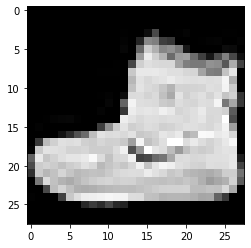

In [11]:
import matplotlib.pyplot as plt
print(image.squeeze().size())
plt.imshow(image.squeeze(), cmap='gray') # squeeze is used to remove 1D enteries from the shape of an array
print("label",label)

In [12]:
batch = next(iter(train_loader)) # similar to sample above
images, labels = batch
images.shape # dimention (B X C X H X W)

torch.Size([10, 1, 28, 28])

torch.Size([3, 32, 302])
labels tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


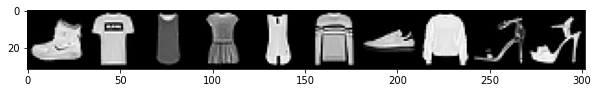

In [13]:
# print images in a batch

grid = torchvision.utils.make_grid(images, nrow=10) # creating a grid
plt.figure(figsize=(10,10))
print(grid.shape)
plt.imshow(np.transpose(grid, (1,2,0)))
print("labels", labels)

In [0]:
# 2) Build the model

import torch.nn as nn

In [0]:
class Network(nn.Module):
  def __init__(self):
    super(Network, self).__init__()
    # 1 ip channel will be convolved by 6 diff filters which will create 6 output channels
    # in_channel is dependent on no. of color channels present inside the images. here, gray scale. hence 1
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) # in_channel, out_channel etc -> parameters (place holder); 1,6 etc -> arguments (values)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5) # kernel --> filter
    # out_channels, kernel_size, out_features are hyperparemeters - whose values are chosen manually and arbitrarily.. the rest are data-dependent hyperparameters.
    # weights present inside each conv layer (network.conv1.weight) of the network also the bias are learnable parameters - values which gets updated as the nw learns when loss functions are minimized.
    # out_channels -> feature maps
    self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10) # out_features depend on the no.of classes/classification present in the training set ie 10 (trouser, pullover etc)
  
  def forward(self, t):
    return t

In [23]:
network = Network() # instance of our network
print(network.conv1.weight.shape) # prints the rank 4 tensor with [out_channel, input_channel, kernel_height, kernel_width]
# means one color channel(input channel/depth of the filter) is convolved by 6 filters of 5x5 size. 
print(network.conv2.weight.shape)
print(network.conv2.weight[0].shape) # gives tensor for a single filter.
print(network.conv1.weight) # learnable parameters
# in conv layers, weight values live inside the kernels/filters. the conv opern is an opern between input channel to the layer and the filter inside the layer. 
print("fc1", network.fc1.weight)
network

torch.Size([6, 1, 5, 5])
torch.Size([12, 6, 5, 5])
torch.Size([6, 5, 5])
Parameter containing:
tensor([[[[ 3.5874e-02, -1.7886e-01,  1.3647e-01, -4.7386e-02,  3.7154e-02],
          [ 9.6245e-02, -1.3246e-01,  1.9012e-02, -1.0927e-01,  9.5293e-02],
          [ 1.9283e-02,  1.7757e-01,  4.4405e-02, -6.4676e-02,  8.8700e-02],
          [ 1.8149e-01, -9.4846e-05,  6.5003e-02, -1.8154e-01, -8.2140e-02],
          [-1.6490e-01, -2.1026e-02, -1.5915e-01, -3.7580e-02,  1.3642e-01]]],


        [[[ 8.6554e-02,  1.3255e-01,  1.5620e-01, -8.6839e-02, -1.9644e-02],
          [-1.2831e-01, -1.3297e-01,  2.8399e-02, -1.1215e-01,  1.7282e-01],
          [ 1.7968e-01,  1.6462e-01,  9.8743e-02, -4.1207e-02,  1.1771e-01],
          [ 1.4951e-01, -2.4231e-02, -1.3767e-01, -1.9581e-01, -1.5698e-01],
          [-1.3460e-01,  4.0635e-02, -1.9894e-01,  1.1145e-01, -1.4415e-01]]],


        [[[ 1.5884e-01, -7.2052e-02,  1.5966e-01, -1.1768e-01, -1.4877e-01],
          [ 2.6933e-02, -1.2610e-01, -3.7981e-02, 

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)